This jupyter notebook was focused on necessary data preprocessing techniques and tried to improve the accuracy of the model

#### Data Preprocessing Techniques
* EDA to capture differebt patterns of the dataset
* Handlig duplicate values
* Outlier detection according to IQR method;
    * replace the outliers from median of the relevant variables
    * remove the outliers
* Transformation of the response variable
    * Log Transformation
    * Boxcoc Tnsformation
    * Quantile Transformation
* Scale the dataset from Standardize and Normalize techniques
* Modeling scaled and non-scaled data 
* Evaluating the model

### 1) Data Preprocessing

#### 1.1) Libraries

In [33]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # MATLAB-like way of plotting
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import QuantileTransformer

# sklearn package for machine learning in python:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#### 1.2) Importing Dataset

In [2]:
df = pd.read_csv('houseprice_data.csv')
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


#### 1.3) Get the brief summary 

In [3]:
# Statistics of the dataset
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [4]:
# Get the information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  zipcode        21613 non-null  int64  
 15  lat            21613 non-null  float64
 16  long           21613 non-null  float64
 17  sqft_living15  21613 non-null  int64  
 18  sqft_l

#### 1.4) Missing values handling

In [5]:
missing_values = df.isnull().sum()

# Display the count of missing values
print(missing_values)

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


There are not missing values in any of the variable. Therefore we don't have to do missing value handling part

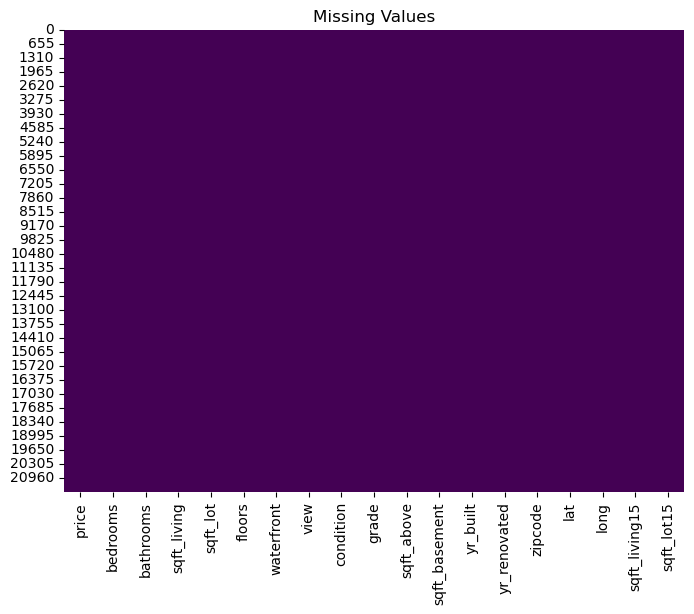

In [6]:
# Create a heatmap to visualize missing values
plt.figure(figsize=(8, 6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)
plt.title('Missing Values')
plt.show()

#### 1.5) Duplicate value handling

In [7]:
duplicate_rows = df[df.duplicated(keep='first')]
# first occurrence of the duplicate and marks the rest as duplicates.
num_duplicate_rows = len(duplicate_rows)

print(f"Number of duplicate rows: {num_duplicate_rows}")

Number of duplicate rows: 5


There are 5 duplicate rows in the dataset according to the results. Now we have to remove them before building the model

In [8]:
# Remove duplicate rows from the DataFrame
data = df.drop_duplicates(keep='first')

In [9]:
duplicate_rows = data[data.duplicated(keep='first')]
num_duplicate_rows = len(duplicate_rows)
print(f"Number of duplicate rows: {num_duplicate_rows}")

Number of duplicate rows: 0


Now the dataset doesn't have duplicate rows

#### 1.6) Data distribution of each variable

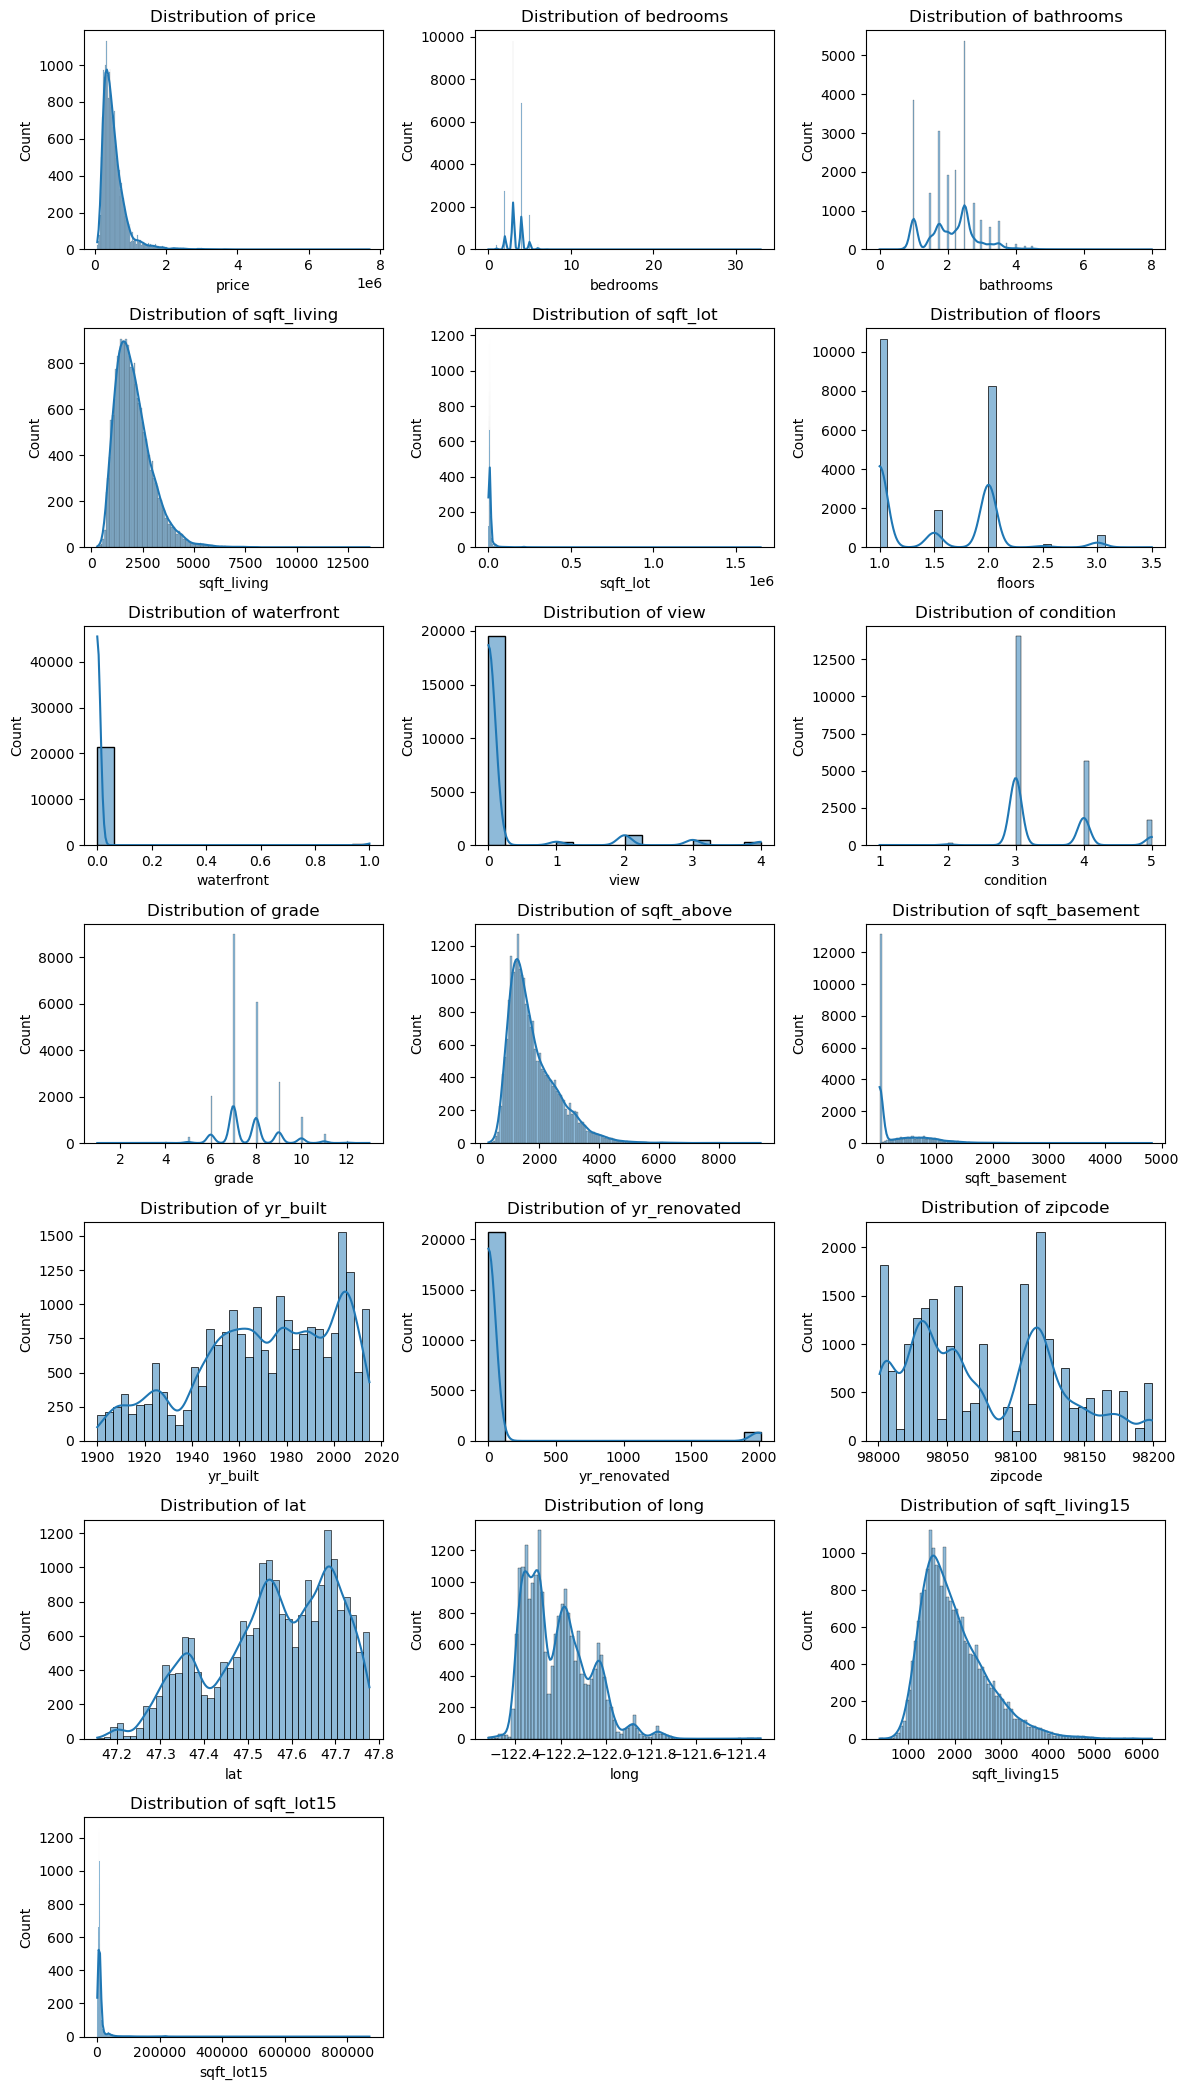

In [10]:
# Create subplots for each variable
plt.figure(figsize=(12, 21))  # Adjust the figure size as needed
for i, column in enumerate(data.columns):
    plt.subplot(7, 3, i + 1)  # Adjust the subplot layout as needed
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

Apparently all the variables don't follow the normal distribution

#### 1.7) Outlier handling

* Detecting outliers using boxplots

price                Axes(0.125,0.77;0.168478x0.11)
bedrooms          Axes(0.327174,0.77;0.168478x0.11)
bathrooms         Axes(0.529348,0.77;0.168478x0.11)
sqft_living       Axes(0.731522,0.77;0.168478x0.11)
sqft_lot            Axes(0.125,0.638;0.168478x0.11)
floors           Axes(0.327174,0.638;0.168478x0.11)
waterfront       Axes(0.529348,0.638;0.168478x0.11)
view             Axes(0.731522,0.638;0.168478x0.11)
condition           Axes(0.125,0.506;0.168478x0.11)
grade            Axes(0.327174,0.506;0.168478x0.11)
sqft_above       Axes(0.529348,0.506;0.168478x0.11)
sqft_basement    Axes(0.731522,0.506;0.168478x0.11)
yr_built            Axes(0.125,0.374;0.168478x0.11)
yr_renovated     Axes(0.327174,0.374;0.168478x0.11)
zipcode          Axes(0.529348,0.374;0.168478x0.11)
lat              Axes(0.731522,0.374;0.168478x0.11)
long                Axes(0.125,0.242;0.168478x0.11)
sqft_living15    Axes(0.327174,0.242;0.168478x0.11)
sqft_lot15       Axes(0.529348,0.242;0.168478x0.11)
dtype: objec

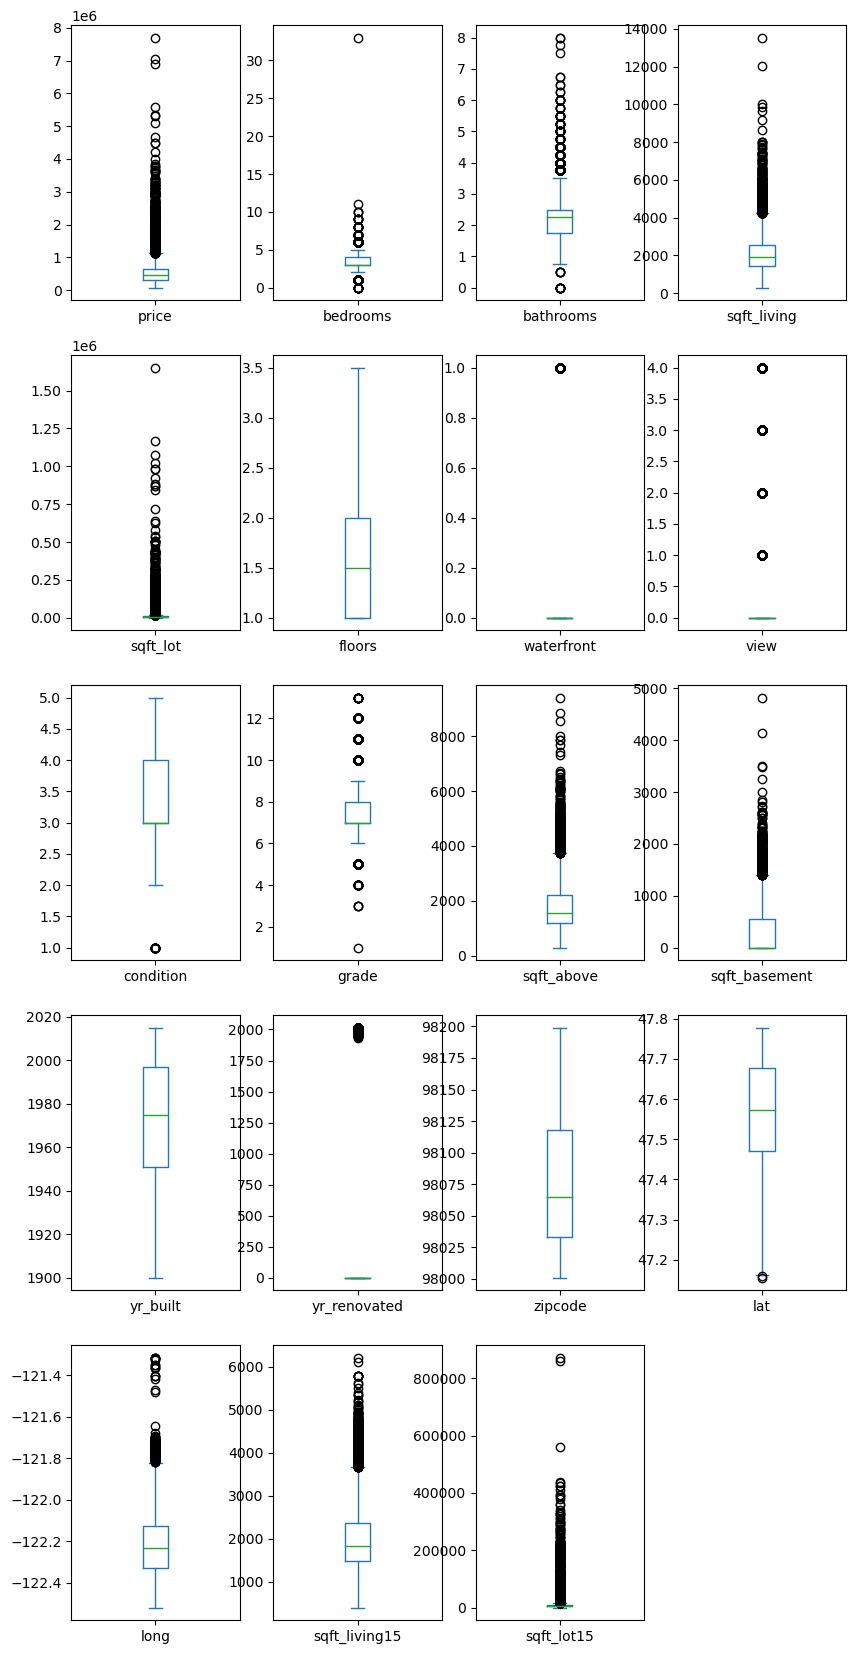

In [11]:
df.iloc[:,0:20].plot(kind="box", subplots=True, layout=(6,4), figsize=(10,25))

* Check the extreme outliers

In [12]:
#Define a function to calculate the percentage of outliers
def percentage_outliers(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 3 * iqr
    upper_bound = q3 + 3 * iqr
    outliers = series[(series < lower_bound) | (series > upper_bound)]
    return len(outliers) / len(series) * 100

# Calculate the percentage of outliers for each variable
outlier_percentages = df.apply(percentage_outliers)

# Display the result
print(outlier_percentages)


price            1.943275
bedrooms         0.111044
bathrooms        0.296118
sqft_living      0.342387
sqft_lot         8.194142
floors           0.000000
waterfront       0.754176
view             9.827419
condition        0.000000
grade            0.495072
sqft_above       0.277611
sqft_basement    0.134179
yr_built         0.000000
yr_renovated     4.228936
zipcode          0.000000
lat              0.000000
long             0.078656
sqft_living15    0.106417
sqft_lot15       7.463101
dtype: float64


* Replace all the outliers from relevant variable's median value

In [13]:
#Calculate the lower and upper bounds for identifying outliers
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 3 * IQR
upper_bound = Q3 + 3 * IQR

# Replace outliers with the median
median_value = df['price'].median()
df.loc[(df['price'] < lower_bound) | (df['price'] > upper_bound), 'price'] = median_value

df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


* Remove the outliers

In [ ]:
""""
df_updated = df.iloc[:,:]

def outliers_for_features(df, col):    
    Q1 = df.loc[:,col].quantile(0.25)
    Q3 = df.loc[:,col].quantile(0.75)
    
    upper_limit = Q3 + 1.5*(Q3-Q1)
    lower_limit = Q1 - 1.5*(Q3-Q1)
    
    return df_updated[col].apply(lambda x : upper_limit if x > upper_limit else lower_limit if x < lower_limit else x)
    
for col in df.iloc[:,0:19]:
    df_updated[col] = outliers_for_features(df, col)
""""

* Check the dataset has the extreme outliers

In [14]:
# Define a function to calculate the percentage of outliers
def percentage_outliers(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 3 * iqr
    upper_bound = q3 + 3 * iqr
    outliers = series[(series < lower_bound) | (series > upper_bound)]
    return len(outliers) / len(series) * 100

# Calculate the percentage of outliers for each variable
outlier_percentages = data.apply(percentage_outliers)

# Display the result
print(outlier_percentages)


price            1.943725
bedrooms         0.111070
bathrooms        0.296187
sqft_living      0.342466
sqft_lot         8.196039
floors           0.000000
waterfront       0.754350
view             9.825065
condition        0.000000
grade            0.495187
sqft_above       0.277675
sqft_basement    0.134210
yr_built         0.000000
yr_renovated     4.225287
zipcode          0.000000
lat              0.000000
long             0.078675
sqft_living15    0.106442
sqft_lot15       7.464828
dtype: float64


#### 1.8) Correlation analysis

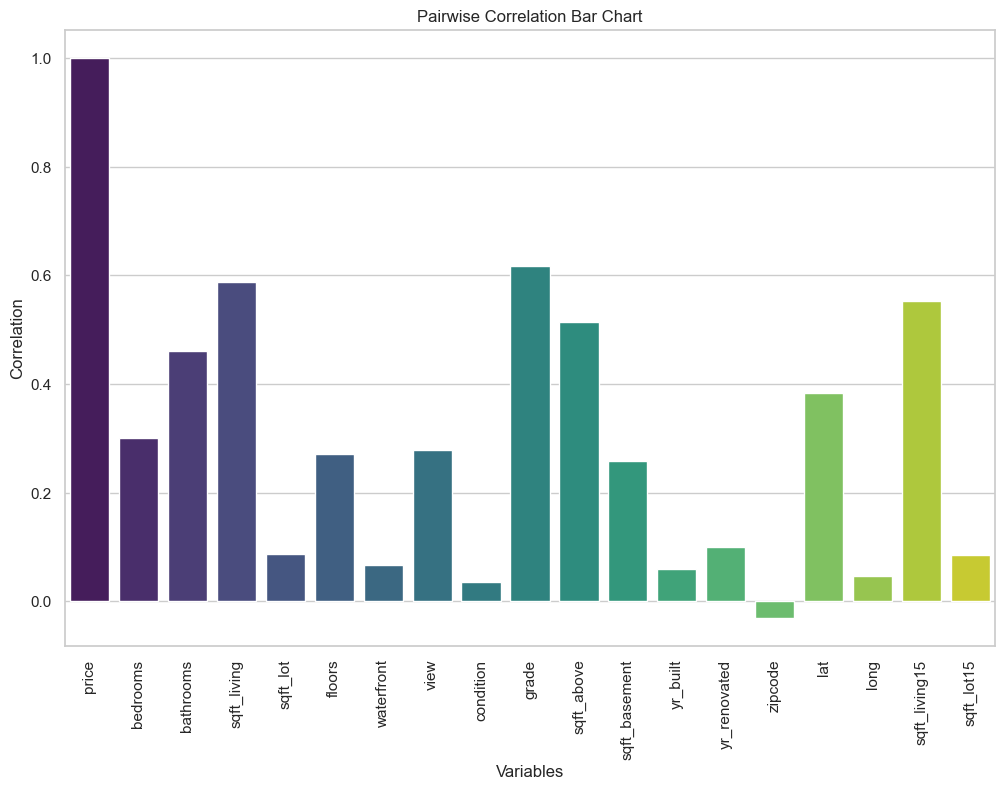

In [15]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Create a bar chart to display the correlations
plt.figure(figsize=(12, 8))  # Set the figure size
sns.set(style="whitegrid")  # Set the style of the chart

# Create a bar chart using a horizontal barplot
sns.barplot(x=corr_matrix.index, y=corr_matrix["price"], palette="viridis")

# Customize the chart
plt.title("Pairwise Correlation Bar Chart")
plt.xlabel("Variables")
plt.ylabel("Correlation")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

plt.show()

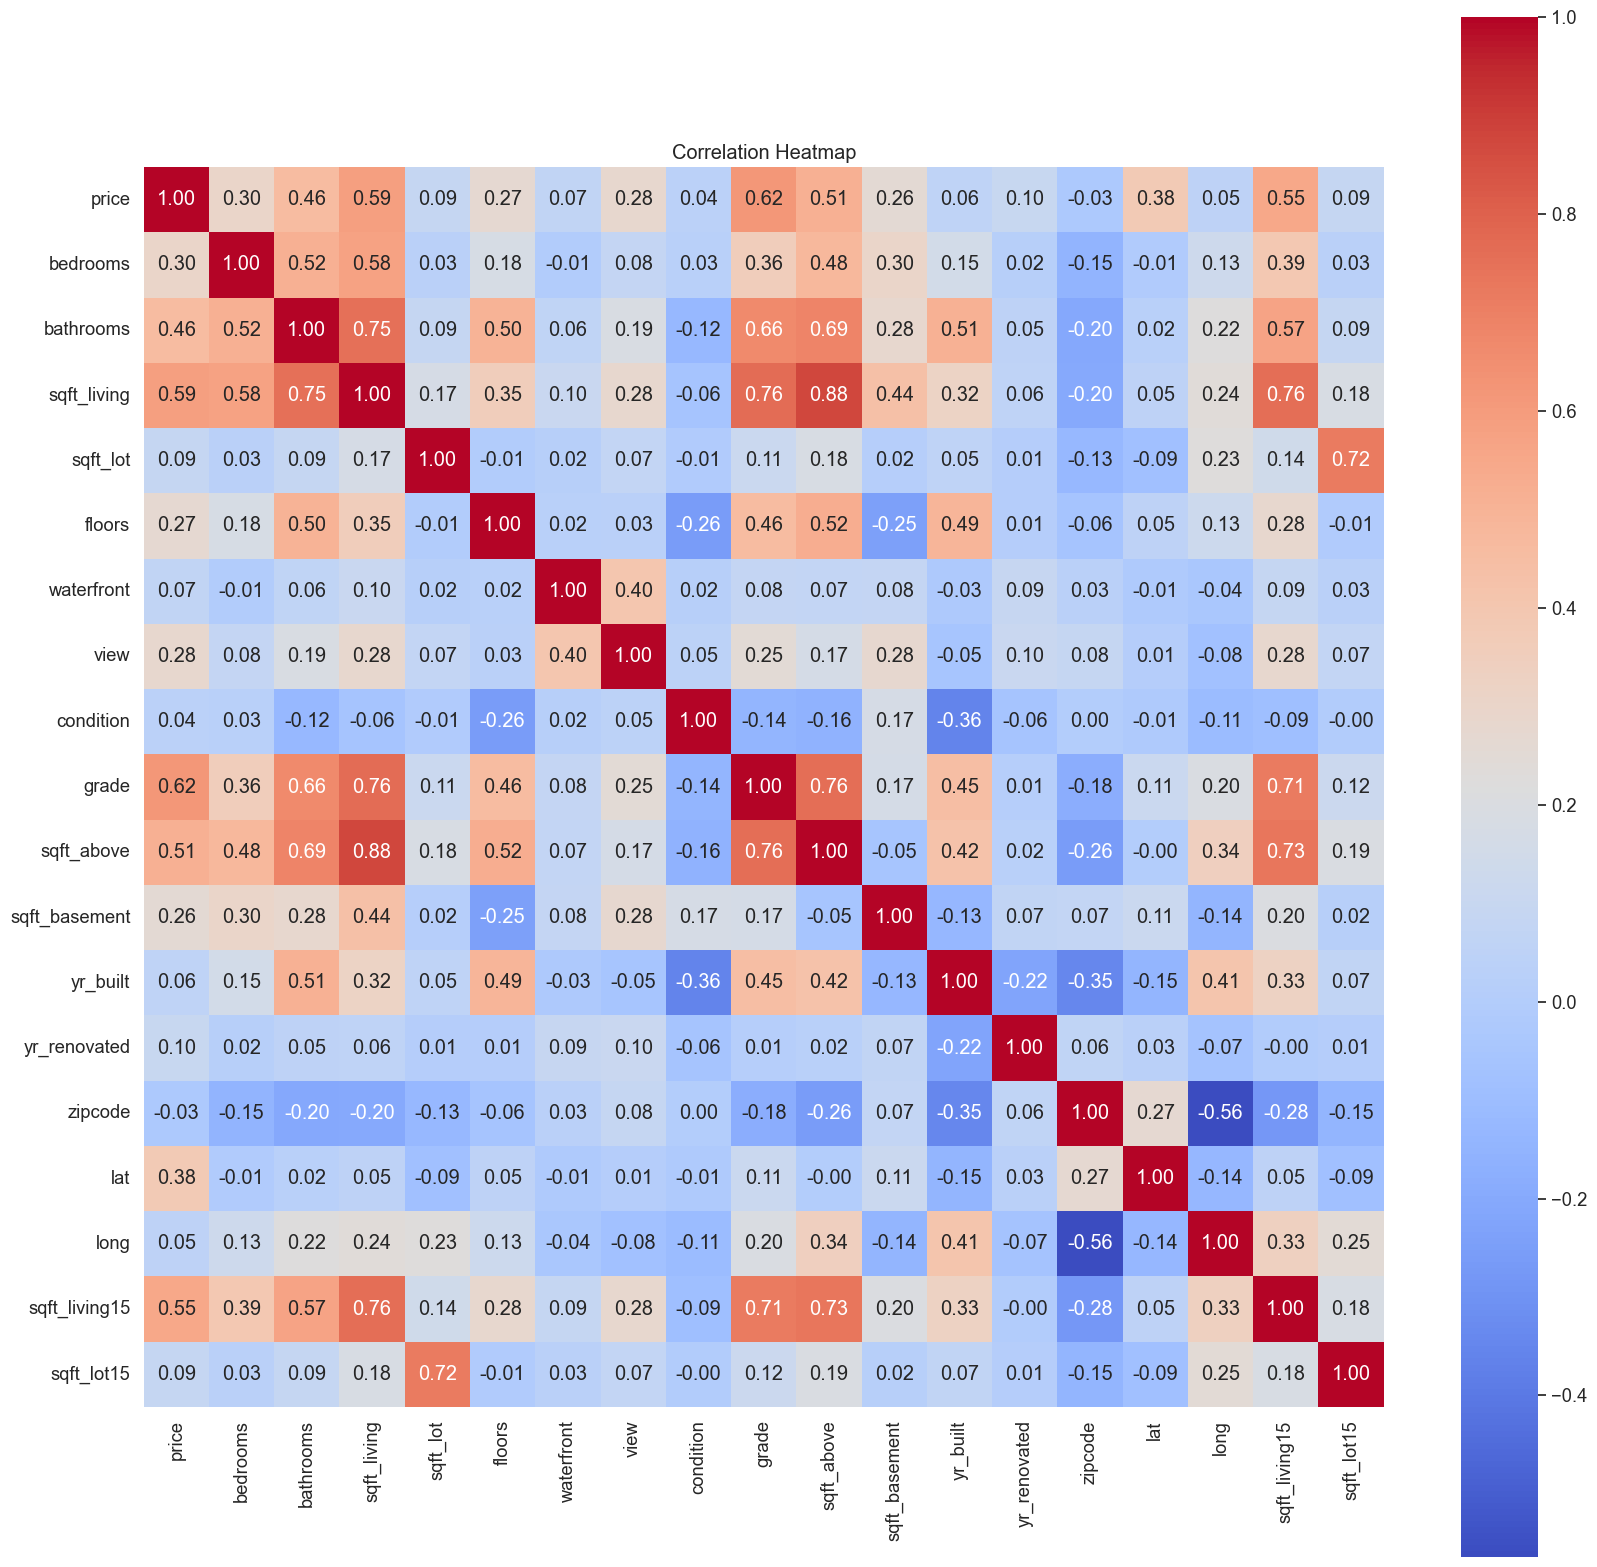

In [16]:
# Create a heatmap
plt.figure(figsize=(20, 20))
sns.set(font_scale=1.2)  # Adjust font size for better readability

# Create a heatmap with the correlation matrix
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)

# Customize the plot
plt.title("Correlation Heatmap")
plt.show()

In [17]:
#data = df.drop(columns=['zipcode'])
data = df

In [18]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


#### 1.8) Feature Scaling

* Standardization

In [19]:
X_std = data.iloc[:,1:18]
y = data.iloc[:,0]

In [20]:
X_std.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800


In [21]:
# scale the dataset
X_std.iloc[:,[2,3,9,10,11,12,13,14,15,16]] = StandardScaler().fit_transform(X_std.iloc[:,[2,3,9,10,11,12,13,14,15,16]])

In [22]:
X_std.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15
0,3,1.00,-0.979835,-0.228321,1.0,0,0,3,7,-0.734708,-0.658681,-0.544898,-0.210128,1.870152,-0.352572,-0.306079,-0.943355
1,3,2.25,0.533634,-0.189885,2.0,0,0,3,7,0.460841,0.245141,-0.681079,4.746678,0.879568,1.161568,-0.746341,-0.432686
2,2,1.00,-1.426254,-0.123298,1.0,0,0,3,6,-1.229834,-0.658681,-1.293892,-0.210128,-0.933388,1.283537,-0.135655,1.070140
3,4,3.00,-0.130550,-0.244014,1.0,0,0,5,7,-0.891699,1.397515,-0.204446,-0.210128,1.085160,-0.283288,-1.271816,-0.914174
4,3,2.00,-0.435422,-0.169653,1.0,0,0,3,8,-0.130895,-0.658681,0.544548,-0.210128,-0.073636,0.409550,1.199335,-0.272190


* Normalization

In [23]:
X_nor = data.iloc[:,1:19]
y = data.iloc[:,0]

In [24]:
X_nor.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [25]:
# scale the dataset
X_nor.iloc[:,[2,3,9,10,11,12,13,14,15,16]] = MinMaxScaler().fit_transform(X_nor.iloc[:,[2,3,9,10,11,12,13,14,15,16]])

In [26]:
X_nor.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,1.00,0.067170,0.003108,1.0,0,0,3,7,0.097588,0.000000,0.478261,0.000000,0.893939,0.571498,0.217608,0.161934,5650
1,3,2.25,0.172075,0.004072,2.0,0,0,3,7,0.206140,0.082988,0.443478,0.988089,0.626263,0.908959,0.166113,0.222165,7639
2,2,1.00,0.036226,0.005743,1.0,0,0,3,6,0.052632,0.000000,0.286957,0.000000,0.136364,0.936143,0.237542,0.399415,8062
3,4,3.00,0.126038,0.002714,1.0,0,0,5,7,0.083333,0.188797,0.565217,0.000000,0.681818,0.586939,0.104651,0.165376,5000
4,3,2.00,0.104906,0.004579,1.0,0,0,3,8,0.152412,0.000000,0.756522,0.000000,0.368687,0.741354,0.393688,0.241094,7503


#### 1.9) Variable Transformation

* Log transformation

In [27]:
y_lg = np.log(data['price'])

C:\Users\DELL\AppData\Local\Temp\ipykernel_2592\3593753133.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_lg, shade=True)


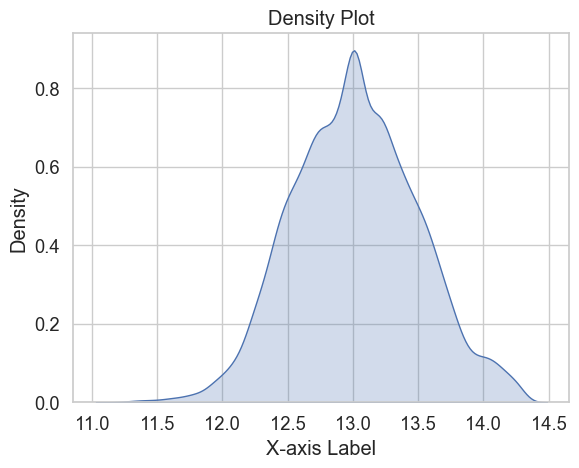

In [28]:
# Create a density plot using seaborn
sns.set_style("whitegrid")
sns.kdeplot(y_lg, shade=True)

# Add labels and a title
plt.xlabel("X-axis Label")
plt.ylabel("Density")
plt.title("Density Plot")

# Show the plot
plt.show()

* Boxcox transformation

C:\Users\DELL\AppData\Local\Temp\ipykernel_2592\3586174854.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(transformed_y, shade=True)


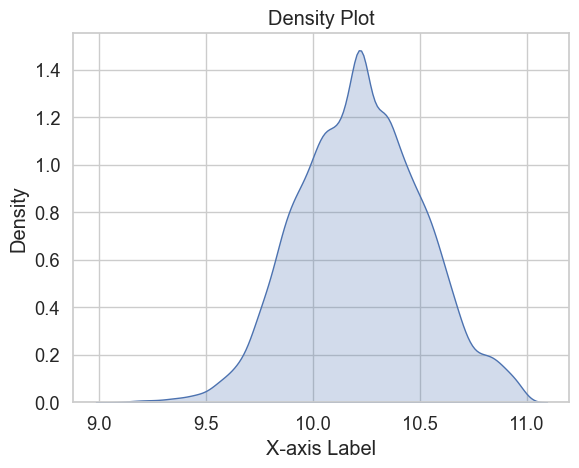

In [31]:
transformed_y, lambda_ = stats.boxcox(y)
# Create a density plot using seaborn
sns.set_style("whitegrid")
sns.kdeplot(transformed_y, shade=True)

# Add labels and a title
plt.xlabel("X-axis Label")
plt.ylabel("Density")
plt.title("Density Plot")

# Show the plot
plt.show()

* Quantile transformation

C:\Users\DELL\AppData\Local\Temp\ipykernel_2592\1703434255.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_qt, shade=True)


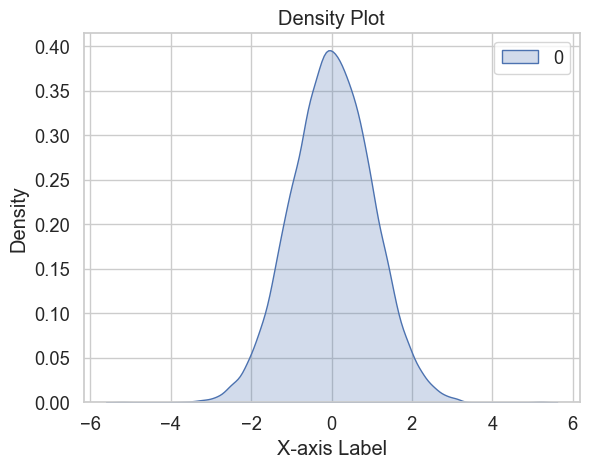

In [34]:
# Convert the Series to a NumPy array and then reshape
y_array = y.to_numpy().reshape(-1, 1)

# Create a QuantileTransformer instance
quantile_transformer = QuantileTransformer(output_distribution='normal', random_state=0)

# Fit and transform the response variable
y_qt = quantile_transformer.fit_transform(y_array)


# Create a density plot using seaborn
sns.set_style("whitegrid")
sns.kdeplot(y_qt, shade=True)

# Add labels and a title
plt.xlabel("X-axis Label")
plt.ylabel("Density")
plt.title("Density Plot")

# Show the plot
plt.show()

### 2) Modeling

#### 2.1) Modeling using unscaled data

In [36]:
X = data.iloc[:,1:18]
y = data.iloc[:,0]

In [37]:
# split the data into training and test sets:
X_train, X_test, y_train, y_test = train_test_split(X, y_qt, test_size = 1/4, random_state = 0)

In [38]:
# fit the linear least-squares regression line to the training data:
regr = LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

In [39]:
# The coefficients
print('Coefficients: ', regr.coef_)
# The coefficients
print('Intercept: ', regr.intercept_)
# The mean squared error
print('Mean squared error: %.8f'% mean_squared_error(y_test, regr.predict(X_test)))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_test, regr.predict(X_test)))

Coefficients:  [[ 3.68966962e-02  1.37743094e-01  6.02392736e-05  1.11183821e-06
   2.00175519e-01 -2.90315814e-01  7.10602472e-02  1.23542558e-01
   2.88248294e-01 -1.68746927e-05  7.71139662e-05 -5.46154884e-03
   6.31301905e-05 -6.70672094e-04  2.87581189e+00 -6.56656636e-02
   2.69120888e-04]]
Intercept:  [-72.28168761]
Mean squared error: 0.36151012
Coefficient of determination: 0.63


#### 2.2) Modeling using standardized data

In [40]:
X_train_std, X_test_std, y_train, y_test = train_test_split( X_std, y_qt, test_size=1/4)

In [41]:
# fit the linear least-squares regression line to the training data:
regr_std = LinearRegression()
regr_std.fit(X_train_std, y_train)

LinearRegression()

In [42]:
# The coefficients
print('Coefficients: ', regr_std.coef_)
# The coefficients
print('Intercept: ', regr_std.intercept_)
# The mean squared error
print('Mean squared error: %.8f'% mean_squared_error(y_test, regr_std.predict(X_test_std)))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_test, regr_std.predict(X_test_std)))

Coefficients:  [[ 1.84945876e-02  1.11987430e-01 -1.24181770e+13  4.70112576e-02
   1.97695696e-01 -3.53293681e-01  8.58558348e-02  1.33178181e-01
   2.86200475e-01  1.11965619e+13  5.98402709e+12 -1.52585521e-01
   2.77790704e-02 -4.14575767e-02  3.95543063e-01 -7.92936817e-03
   1.78346674e-01]]
Intercept:  [-3.25453308]
Mean squared error: 0.37458887
Coefficient of determination: 0.62


#### 2.3) Modeling using normalized data

In [44]:
X_train_nor, X_test_nor, y_train, y_test = train_test_split( X_nor, y_qt, test_size=1/4)

In [45]:
# fit the linear least-squares regression line to the training data:
regr_nor = LinearRegression()
regr_nor.fit(X_train_nor, y_train)

LinearRegression()

In [46]:
# The coefficients
print('Coefficients: ', regr_nor.coef_)
# The coefficients
print('Intercept: ', regr_nor.intercept_)
# The mean squared error
print('Mean squared error: %.8f'% mean_squared_error(y_test, regr_nor.predict(X_test_nor)))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_test, regr_nor.predict(X_test_nor)))

Coefficients:  [[ 3.05840441e-02  1.14751999e-01  4.25215407e-01  1.40382233e+00
   2.09370931e-01 -3.36661534e-01  6.96482993e-02  1.30954306e-01
   2.89314100e-01  2.91617161e-01  6.17127725e-01 -6.22017443e-01
   1.69530921e-01 -1.50823039e-01  1.80174047e+00 -6.46670472e-02
   1.46618634e+00  2.80883947e-07]]
Intercept:  [-4.60677572]
Mean squared error: 0.36752284
Coefficient of determination: 0.63
